In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk.corpus
import string
import matplotlib
import spacy

%matplotlib inline


This is the file that includes steps for us to analysis the content from BBC News.

    The following analysis is based on the data that was crawled while writing. And I stored relevant data in a csv file and uploaded it with my assignment.

### Questions:
    1. Can we know the distribution of the length of articles' title/content?
    2. What is the most of top 20 common words(after cleaning) in the articles' content?
    3. Can we recognize and analysis various types of named entities in contents?
    4. Can we give any thoughts on the result?

## Data Preparation

In [4]:
bbc=pd.read_csv('./bbcnews.csv')

In [96]:
bbc

,Title,Content,Tag,Time,URL
0,Capitol riots: FBI warnings amid fears of more...,The FBI is warning of the possibility of arme...,BBC News - World,"Tue, 12 Jan 2021 00:26:59 GMT",https://www.bbc.co.uk/news/world-us-canada-556...
1,Trump impeachment move: Democrats start push t...,Democrats have introduced an article of impea...,BBC News - World,"Mon, 11 Jan 2021 18:39:34 GMT",https://www.bbc.co.uk/news/world-us-canada-556...
2,Capitol police officer Eugene Goodman hailed a...,A US Capitol police officer is being called a...,BBC News - World,"Tue, 12 Jan 2021 03:06:10 GMT",https://www.bbc.co.uk/news/world-us-canada-556...
3,Cuba placed back on US terrorism sponsor list,The US has placed Cuba back on a list of stat...,BBC News - World,"Mon, 11 Jan 2021 23:47:26 GMT",https://www.bbc.co.uk/news/world-latin-america...
4,Stammering: 'I thought it made me a failure',Next week Joe Biden will be inaugurated as th...,BBC News - World,"Tue, 12 Jan 2021 00:03:58 GMT",https://www.bbc.co.uk/news/uk-55620280
...,...,...,...,...,...
286,The secret artists creating miniature building...,"On streets across Europe, a secret organisati...",BBC News - Entertainment & Arts,"Sun, 10 Jan 2021 00:04:56 GMT",https://www.bbc.co.uk/news/entertainment-arts-...
287,Meet Pa Salieu - winner of the BBC's Sound Of ...,Rapper Pa Salieu is winner of BBC Music's Sou...,BBC News - Entertainment & Arts,"Thu, 07 Jan 2021 10:08:22 GMT",https://www.bbc.co.uk/news/entertainment-arts-...
288,Covid: Joe Wicks wants to help kids 'feel opti...,Celebrity personal trainer Joe Wicks will be ...,BBC News - Entertainment & Arts,"Tue, 05 Jan 2021 11:12:53 GMT",https://www.bbc.co.uk/news/entertainment-arts-...
289,"6,561 metal flowers: One man's Covid tribute",Artist Geert van der Vossen has created a flo...,BBC News - Entertainment & Arts,"Tue, 05 Jan 2021 00:03:47 GMT",https://www.bbc.co.uk/news/world-55415765


So we have a dataframe with 291 rows and 5 columns.

## Data Cleaning
Due to the use of multiple rss sources，some news is repeated. For more a accurate analysis,we should first do data preprocessing to remove duplicate data. The same news has the same headline, so when news with the same headline appears, only the first one will be kept.

In [7]:
data=bbc.drop_duplicates(subset='Title',keep='first',inplace=False)

In [8]:
data

,Title,Content,Tag,Time,URL
0,Capitol riots: FBI warnings amid fears of more...,The FBI is warning of the possibility of arme...,BBC News - World,"Tue, 12 Jan 2021 00:26:59 GMT",https://www.bbc.co.uk/news/world-us-canada-556...
1,Trump impeachment move: Democrats start push t...,Democrats have introduced an article of impea...,BBC News - World,"Mon, 11 Jan 2021 18:39:34 GMT",https://www.bbc.co.uk/news/world-us-canada-556...
2,Capitol police officer Eugene Goodman hailed a...,A US Capitol police officer is being called a...,BBC News - World,"Tue, 12 Jan 2021 03:06:10 GMT",https://www.bbc.co.uk/news/world-us-canada-556...
3,Cuba placed back on US terrorism sponsor list,The US has placed Cuba back on a list of stat...,BBC News - World,"Mon, 11 Jan 2021 23:47:26 GMT",https://www.bbc.co.uk/news/world-latin-america...
4,Stammering: 'I thought it made me a failure',Next week Joe Biden will be inaugurated as th...,BBC News - World,"Tue, 12 Jan 2021 00:03:58 GMT",https://www.bbc.co.uk/news/uk-55620280
...,...,...,...,...,...
286,The secret artists creating miniature building...,"On streets across Europe, a secret organisati...",BBC News - Entertainment & Arts,"Sun, 10 Jan 2021 00:04:56 GMT",https://www.bbc.co.uk/news/entertainment-arts-...
287,Meet Pa Salieu - winner of the BBC's Sound Of ...,Rapper Pa Salieu is winner of BBC Music's Sou...,BBC News - Entertainment & Arts,"Thu, 07 Jan 2021 10:08:22 GMT",https://www.bbc.co.uk/news/entertainment-arts-...
288,Covid: Joe Wicks wants to help kids 'feel opti...,Celebrity personal trainer Joe Wicks will be ...,BBC News - Entertainment & Arts,"Tue, 05 Jan 2021 11:12:53 GMT",https://www.bbc.co.uk/news/entertainment-arts-...
289,"6,561 metal flowers: One man's Covid tribute",Artist Geert van der Vossen has created a flo...,BBC News - Entertainment & Arts,"Tue, 05 Jan 2021 00:03:47 GMT",https://www.bbc.co.uk/news/world-55415765


After data cleaning we have a new dataframe with 247 rows and 5 columns.

### Answer 1:
    
    （Q：Can we know the distribution of the length of articles' title/content?）
    
    In this part, we can get the length of the articles' title/content. We can also explore some statistics of these data like median, sum, mean. etc...
    

Defined a function to return number of words in content.

In [9]:
def word_count(content):
    return len(content)

Creating additional columns：Content_Count(number of words in content) and Title_Count(number of words in title) columns.

In [17]:
data['Content_Count']=data['Content'].apply(word_count)

<ipython-input-17-119b0431e8b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Content_Count']=data['Content'].apply(word_count)


In [19]:
data['Title_Count']=data['Title'].apply(word_count)

<ipython-input-19-b0bf57d519e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Title_Count']=data['Title'].apply(word_count)


In [20]:
data

,Title,Content,Tag,Time,URL,Content_Count,Title_Count
0,Capitol riots: FBI warnings amid fears of more...,The FBI is warning of the possibility of arme...,BBC News - World,"Tue, 12 Jan 2021 00:26:59 GMT",https://www.bbc.co.uk/news/world-us-canada-556...,6334,65
1,Trump impeachment move: Democrats start push t...,Democrats have introduced an article of impea...,BBC News - World,"Mon, 11 Jan 2021 18:39:34 GMT",https://www.bbc.co.uk/news/world-us-canada-556...,6593,65
2,Capitol police officer Eugene Goodman hailed a...,A US Capitol police officer is being called a...,BBC News - World,"Tue, 12 Jan 2021 03:06:10 GMT",https://www.bbc.co.uk/news/world-us-canada-556...,5208,56
3,Cuba placed back on US terrorism sponsor list,The US has placed Cuba back on a list of stat...,BBC News - World,"Mon, 11 Jan 2021 23:47:26 GMT",https://www.bbc.co.uk/news/world-latin-america...,2213,45
4,Stammering: 'I thought it made me a failure',Next week Joe Biden will be inaugurated as th...,BBC News - World,"Tue, 12 Jan 2021 00:03:58 GMT",https://www.bbc.co.uk/news/uk-55620280,354,44
...,...,...,...,...,...,...,...
286,The secret artists creating miniature building...,"On streets across Europe, a secret organisati...",BBC News - Entertainment & Arts,"Sun, 10 Jan 2021 00:04:56 GMT",https://www.bbc.co.uk/news/entertainment-arts-...,484,63
287,Meet Pa Salieu - winner of the BBC's Sound Of ...,Rapper Pa Salieu is winner of BBC Music's Sou...,BBC News - Entertainment & Arts,"Thu, 07 Jan 2021 10:08:22 GMT",https://www.bbc.co.uk/news/entertainment-arts-...,479,50
288,Covid: Joe Wicks wants to help kids 'feel opti...,Celebrity personal trainer Joe Wicks will be ...,BBC News - Entertainment & Arts,"Tue, 05 Jan 2021 11:12:53 GMT",https://www.bbc.co.uk/news/entertainment-arts-...,611,53
289,"6,561 metal flowers: One man's Covid tribute",Artist Geert van der Vossen has created a flo...,BBC News - Entertainment & Arts,"Tue, 05 Jan 2021 00:03:47 GMT",https://www.bbc.co.uk/news/world-55415765,120,44


In [21]:
data['Content_Count'].mean()

4008.089068825911

In [22]:
data['Content_Count'].sum()

989998

In [23]:
data['Title_Count'].mean()

54.85425101214575

In [24]:
data['Title_Count'].sum()

13549

In [25]:
data['Content_Count'].describe()

count      247.000000
mean      4008.089069
std       2761.034375
min         52.000000
25%       2061.000000
50%       3945.000000
75%       5718.000000
max      14721.000000
Name: Content_Count, dtype: float64

In [26]:
data['Title_Count'].describe()

count    247.000000
mean      54.854251
std       10.120163
min       23.000000
25%       49.000000
50%       54.000000
75%       61.000000
max       98.000000
Name: Title_Count, dtype: float64

We can use describe function to get descriptive statistics like dataset's distribution. We can also use function like df.sum() to get other information of datasets. 

For example from data['Content_Count'].mean() we can know the average length of the article is 4008.089068825911.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d03ca430>]],
      dtype=object)

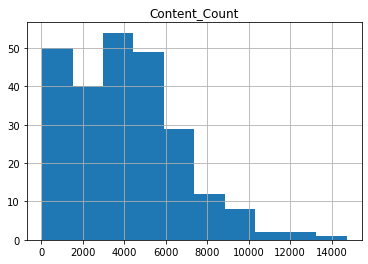

In [27]:
data.hist('Content_Count')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d0568d30>]],
      dtype=object)

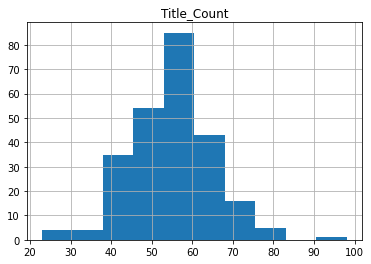

In [28]:
data.hist('Title_Count')

We can use df.hist() to explore distribution of numeric columns using histograms.

In these histograms we can get the distribution of the number of word in titles and contents. 

In the Title_Count histogram we can find that most of title length is around median.

In the Content_Count histogram we can find a different interesting shape. In my opinion, it because some news only 
contains pictures/videos without text description. As we defined before, in this case, we will extract the decription in RSS as content.



### Answer 2

    （Q：What is the most of top 20 common words(after cleaning) in the articles' content?）
    
    First, we clean the data by removing the punctuation and stopwords. Next, we use different NLP libraries to get the most common word in all content. Further more, we explore the most common nouns for comparison. Finally, we can get the most top 20 of the common words in the following bar graph.

Define plot_most_freq(text, Top) function, input the text(after tokenization) and The 'Top' （you can set the number as you want). It will return the ‘Top’ most common related strings(by using NLTK), and then we can use matplotlib to plot the bar graph.

In [40]:
def plot_most_freq(text, Top):
    fdist = nltk.FreqDist(text)
    rslt=pd.DataFrame(fdist.most_common(Top),columns=['Word','Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0,figsize=(Top,4))

Define clean_text(txt) function. As NLP task, we need to do tokenization first. In this function, we input the content, and it will remove all the punctuation and stopwords, and then return the token.

In [31]:
def clean_text(txt):
    txt=" ".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',txt)
    stopwords=nltk.corpus.stopwords.words('english')
    txt_clean=[word for word in tokens if word not in stopwords]
    return txt_clean

In [32]:
content=data['Content'].str.lower()
text=clean_text(content)

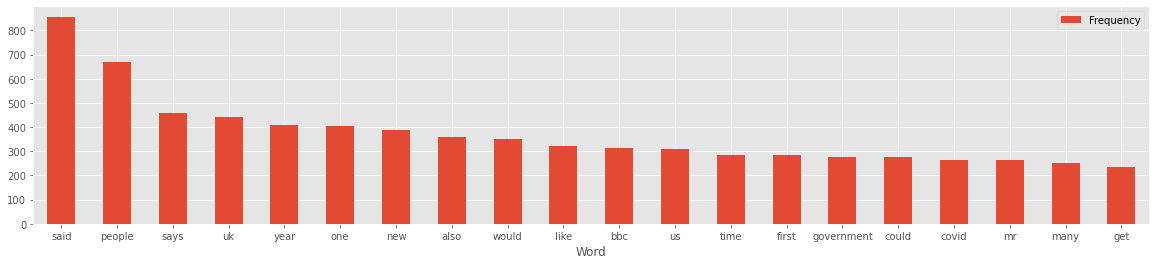

In [41]:
plot_most_freq(text,20)

We firstly lower all string and then do the tokenization. Then we can use plot function to plot most 20 common words.

In [43]:
content=data['Content'].str.lower()
txt=" ".join([c for c in content if c not in string.punctuation])
nlp=spacy.load("en_core_web_sm")
doc=nlp(txt)
nouns=[token.text for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == "NOUN"]

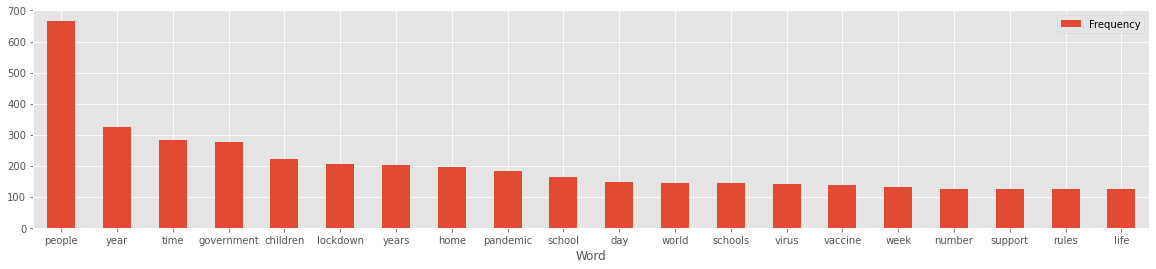

In [44]:
plot_most_freq(nouns,20)

This histogram shows the 20 most common nouns in the articles. 

Although we have plot the 20 most common word before, we can see some verbs still in the plot. In News, verb is not as important as noun. So, in this part, we tried to use another NLP library: Spacy to get the most common Noun. Then, we plot the bar graph.

### Anwser 3

    （Q：Can we recognize and analysis various types of named entities in contents?）
    
    Name Entities Recognization(NER) is an important part in NLP tasks, in the following code, we are using Spacy to recognize various type of named entities in the contents and analysis them. 
    
    
    We explore following entity types:
    
    Person: Person name
    GPE: Geopolitical entity, i.e. countries, cities, states
    NORP: Nationalities or religious or political groups
    WORK_OF_ART: Titles of books and songs,etc

We defined several functions to use library Spacy to recognize various types of named entities. We input contents and then we can get a list of entities.  

In [62]:
def get_person(contents):
    nlp=spacy.load("en_core_web_sm")
    
    data_string=contents
    doc=nlp(data_string)
    
    person=[x.text for x in doc.ents if x.label_=="PERSON"]

    
    return person

In [72]:
def get_gpe(contents):
    nlp=spacy.load("en_core_web_sm")
    
    data_string=contents
    doc=nlp(data_string)
    
    gpe=[x.text for x in doc.ents if x.label_=="GPE"]

    
    return gpe

In [69]:
def get_norp(contents):
    nlp=spacy.load("en_core_web_sm")
    
    data_string=contents
    doc=nlp(data_string)
    
    norp=[x.text for x in doc.ents if x.label_=="NORP"]

    
    return norp

In [70]:
def get_work_of_art(contents):
    nlp=spacy.load("en_core_web_sm")
    
    data_string=contents
    doc=nlp(data_string)
    
    work_of_art=[x.text for x in doc.ents if x.label_=="WORK_OF_ART"]

    
    return work_of_art

In [65]:
data['Person']=data['Content'].apply(get_person)

<ipython-input-65-1e5a96fcfddd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Person']=data['Content'].apply(get_person)


In [73]:
data['GPE']=data['Content'].apply(get_gpe)

<ipython-input-73-e2da8ce58392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['GPE']=data['Content'].apply(get_gpe)


In [74]:
data['NORP']=data['Content'].apply(get_norp)

<ipython-input-74-b0d0dec08264>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['NORP']=data['Content'].apply(get_norp)


In [75]:
data['WORK_OF_ART']=data['Content'].apply(get_work_of_art)

<ipython-input-75-56f17977fac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WORK_OF_ART']=data['Content'].apply(get_work_of_art)


we using df.apply to adding new columns in the dataframe. These columns save different types of entities

In get_word(label,top) function, we count and sort the obtained entities, get top N data and plot the bar graph

In [91]:
def get_word(label,top):
    texts=data[label].tolist()
    words=[]
    
    for text in texts:
        for word in text:
            words.append(word.lower())
            
    fdist=nltk.FreqDist(words)
    rslt=pd.DataFrame(fdist.most_common(top),columns=['Word','Frequency']).set_index('Word')
    
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0, figsize=(top*2,4))
    

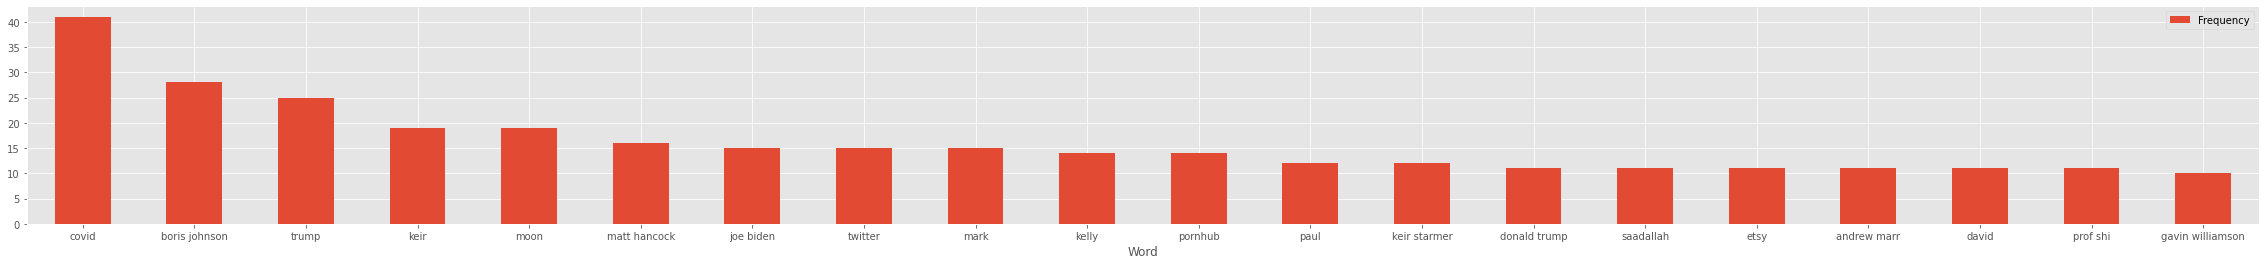

In [92]:
get_word('Person',20)

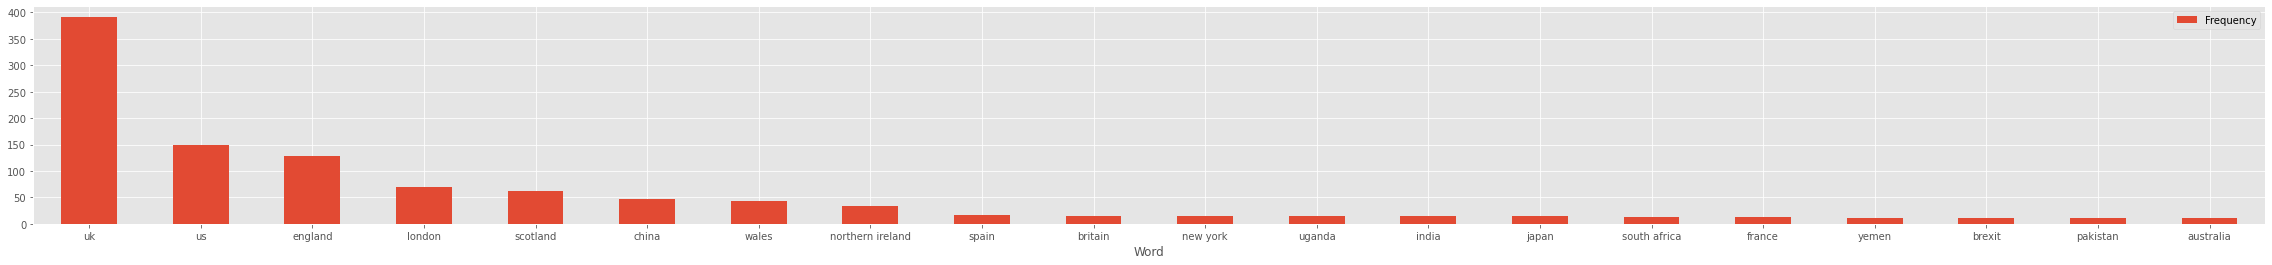

In [93]:
get_word('GPE',20)

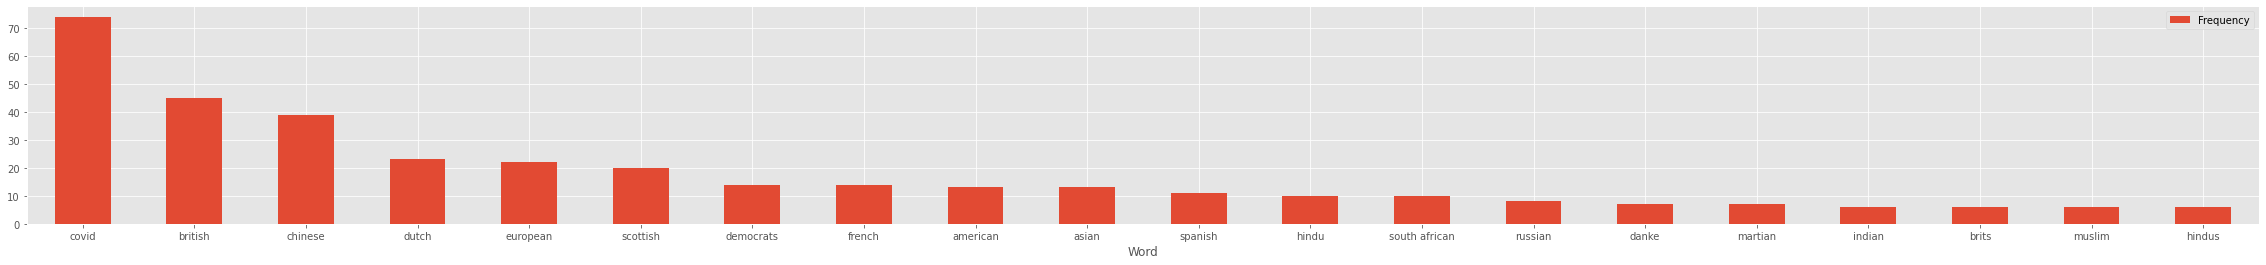

In [94]:
get_word('NORP',20)

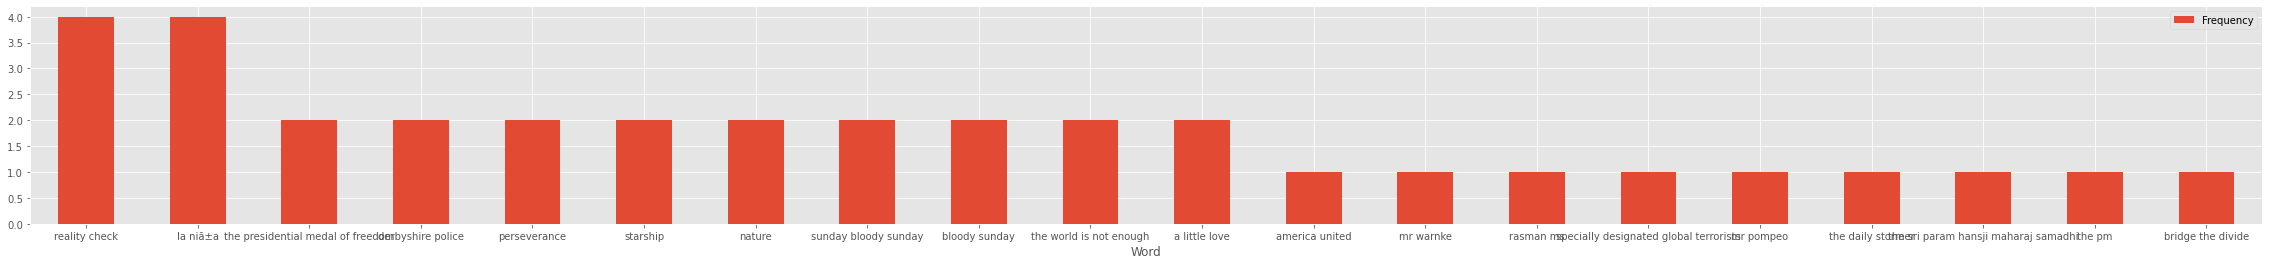

In [95]:
get_word('WORK_OF_ART',20)

Call the function and got the top 20 data bar graphs. Each bar chart shows the 20 most frequently occurring words in the current category and the number of times they appear.

### Answer 4
    
   （Q：Can we give any thoughts on the result?）
    
    Some word can not be labelled correctly. For example, for the word 'COVID', it is labelled as entity PERSON and NORP. But in fact, it does not belong to these two entity types. The latest popular words are not updated in the corpus yet.

    Also, In the type PERSON, we can see donald trump and trump were treated as two different person, but we know they refer to the same person in the News.


## Summarize
     
     Through the text analysis of the content of BBC news articles, I can count the words that appear most in different categories to get a general understanding of current news hotspots. In the analysis of the text, I also found some interesting questions as answered in question 4. Through this data analysis, I have become more proficient in the extraction and analysis of webpage text.
    
    In the future work, I will try different datasets to extract data. Use more data over a period of time to get more convincing conclusions.
